## Principle of Derivatives Securities

### Assignment

#### Shaghayegh Hossein Ghanemi (11304285)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm


>> ## Question 1

### European Put Black-Scholes Model:

In [2]:
# Given parameters
X0 = 1.33   # Current exchange rate price
K = 1.33   # Strike of exchange rate
sigma = 0.1  # Volatility of the underlying asset
rf = 0.01   # foreign risk-free rate
r = 0.02   # local risk-free rate
T_years = 1
n = 12  # number of periods in a year

def BS_put_price(X0, K, sigma, rf, T, r):
    # Calculating d1 and d2 and fomrming the valuation of European put with BS formula
    d1 = (np.log(X0 / K) + (rf - r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))     
    d2 = d1 - sigma * np.sqrt(T)

    put_price = K * np.exp(-rf * T) * norm.cdf(-d2) - X0 * np.exp(-r * T) * norm.cdf(-d1)
    return put_price

# Creating a table
put_prices_table = pd.DataFrame(index=range(1, n+1), columns=["T", "Individual put price European(each for 100 CAD/USD)"])

put_prices_array = np.zeros(n)
# Calculation for 100 of individual European put price and Populating the table
for i in range(1, n+1):
    T = i / n  # Fraction of a year
    #Convert the cost to the desired units (100 CAD/USD)
    put_price = 100 * BS_put_price(X0, K, sigma, r, T, rf)
    
    put_prices_table.at[i, "T"] = T
    put_prices_table.at[i, "Individual put price European(each for 100 CAD/USD)"] = put_price
    put_prices_array[i-1] = put_price
    
# Display the table
print(put_prices_table)


           T Individual put price European(each for 100 CAD/USD)
1   0.083333                                           1.475014 
2   0.166667                                           2.051823 
3       0.25                                           2.480437 
4   0.333333                                           2.832199 
5   0.416667                                           3.134769 
6        0.5                                           3.402347 
7   0.583333                                           3.643374 
8   0.666667                                           3.863356 
9       0.75                                            4.06612 
10  0.833333                                           4.254456 
11  0.916667                                           4.430471 
12       1.0                                           4.595804 


In [3]:
# Calculating the total cost of the European put option
Total_cost = put_prices_table['Individual put price European(each for 100 CAD/USD)'].sum()

print(Total_cost)


40.230171551929004


In [4]:
# Calculating the total cost of the European put option
Total_cost = put_prices_table['Individual put price European(each for 100 CAD/USD)'].sum()

# Adding a new column 'Total Cost' and set the value in the first row
put_prices_table['Total Cost'] = np.nan  # Creating an empty column with NaN values
put_prices_table.at[1, 'Total Cost'] = Total_cost  # Setting the total cost value in the first row

# Print the table
print(put_prices_table)


           T Individual put price European(each for 100 CAD/USD)  Total Cost
1   0.083333                                           1.475014    40.230172
2   0.166667                                           2.051823          NaN
3       0.25                                           2.480437          NaN
4   0.333333                                           2.832199          NaN
5   0.416667                                           3.134769          NaN
6        0.5                                           3.402347          NaN
7   0.583333                                           3.643374          NaN
8   0.666667                                           3.863356          NaN
9       0.75                                            4.06612          NaN
10  0.833333                                           4.254456          NaN
11  0.916667                                           4.430471          NaN
12       1.0                                           4.595804          NaN

### Asian Put Monte Carlo Simulation:

In [5]:
np.random.seed(7)

def asian_put_monte_carlo(N, Zi, X0, r, rf, sigma, T_years, K):
    # Generate all random values needed for the simulation 
    zi_values = np.random.standard_normal((Zi, N))
    
    # Create a matrix to store exchange rates for each period in each simulation
    rate_matrix = np.zeros((N + 1, Zi))
    rate_matrix[0] = X0
    
    # Simulate exchange rates for each period
    for l in range(1, N + 1):
        rate_matrix[l] = rate_matrix[l-1] * np.exp((r - rf - 0.5 * sigma**2) * (T_years / N) + sigma * np.sqrt(T_years / N) * zi_values[:, l-1])
    
    # Calculate the average exchange rate over the N periods for each simulation
    average_stock_price = np.mean(rate_matrix[1:], axis=0)  # Exclude the initial price
    
    # Calculate the payoff for each path using vectorized operations
    payoffs = np.where(K > average_stock_price, np.exp(-r * T_years) * (K - average_stock_price), 0)

    # Convert the cost to the desired units (12 x 100 CAD/USD)
    cost_of_asian_put = np.mean(payoffs) * 12 * 100
    
    return cost_of_asian_put, payoffs

# Parameters
N = 12  # Number of consecutive periods in a year
Zi = 20000  # Number of simulations

# Run the Asian put Monte Carlo simulation
cost_of_asian_put, payoffs = asian_put_monte_carlo(N, Zi, X0, r, rf, sigma, T_years, K)

# Calculate the 95% confidence interval using mean and standard deviation
mean_payoff = np.mean(payoffs)
std_dev_payoff = np.std(payoffs, ddof=1)  # Use ddof=1 for sample standard deviation
confidence_interval_low = mean_payoff - 1.96 * (std_dev_payoff / np.sqrt(Zi))
confidence_interval_high = mean_payoff + 1.96 * (std_dev_payoff / np.sqrt(Zi))

# Print results
print("Cost of an Asian put (for 12 x 100 CAD/USD):", cost_of_asian_put)
print("95% Confidence Interval:", 12 * 100 * confidence_interval_low, 12 * 100 * confidence_interval_high)


Cost of an Asian put (for 12 x 100 CAD/USD): 34.13327742923276
95% Confidence Interval: 33.42890504570748 34.83764981275804


>> ## Question 2

In [6]:
# Add the provided Realized exchange rate to our put prices table
put_prices_table['Realized exchange rate']=[1.3059, 1.2863, 1.3069, 1.2814, 1.2850, 1.2720, 1.2686, 1.2578, 1.2193, 1.2497, 1.2740, 1.2090]

#put_prices_table

# Mean of the realized exhange rate, column R
Mean_realized_exchange=put_prices_table['Realized exchange rate'].mean()

print('Mean of the realized exhange rate: {:.4f}'.format(Mean_realized_exchange))

#Inflows without hedging, column S
in_without_hedge=12*100*Mean_realized_exchange
print('Inflows without hedging: {:.1f}'.format(in_without_hedge))

# Calculating profit for each put, column U
put_prices_table['Profit for each put'] = 100 * np.maximum(K - put_prices_table['Realized exchange rate'], 0) - put_prices_table['Individual put price European(each for 100 CAD/USD)']
# Total profit of European put
Total_profit=put_prices_table['Profit for each put'].sum()
# Display the modified table
print(put_prices_table)

# Replication of Column V
print('Total profit for European puts: {:.1f}'.format(Total_profit))

#Inflows with hedging, column W
in_with_hedge_e = in_without_hedge + Total_profit
print('Inflows with hedging (European):{:.0f}'.format(in_with_hedge_e))

# Asian put profit for each, column Y
profit_asian = 12 * 100 * np.maximum(K - Mean_realized_exchange, 0) - cost_of_asian_put

print('Profit for the Asian put:{:.2f}'.format(profit_asian))

# Inflows with hedging, Asian put option, column Z
in_with_hedge_asian = in_without_hedge + profit_asian

print('Inflows with hedging for Asian put:{:.0f}'.format(in_with_hedge_asian))
# Difference between the hedged quantities (Asian - European)
diff=in_with_hedge_asian - in_with_hedge_e
print('Difference between the hedged quantities (Asian - European):{:.2f}'.format(diff))

Mean of the realized exhange rate: 1.2680
Inflows without hedging: 1521.6
           T Individual put price European(each for 100 CAD/USD)  Total Cost  \
1   0.083333                                           1.475014    40.230172   
2   0.166667                                           2.051823          NaN   
3       0.25                                           2.480437          NaN   
4   0.333333                                           2.832199          NaN   
5   0.416667                                           3.134769          NaN   
6        0.5                                           3.402347          NaN   
7   0.583333                                           3.643374          NaN   
8   0.666667                                           3.863356          NaN   
9       0.75                                            4.06612          NaN   
10  0.833333                                           4.254456          NaN   
11  0.916667                                  

>> ## Question 3

Mean: 1.077465638904369
Median: 3.923303621715263
Standard Deviation: 6.638815240219233
Minimum: -43.78335954373665
Maximum: 6.096894122696767
5th Percentile: -12.654878948883162
95th Percentile: 6.0968941226963125
Proportion of Negative Differences: 0.3144


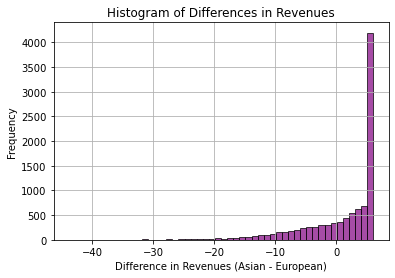

In [7]:
np.random.seed(7)
# Given parameters
alpha=0.0
# Number of simulations
z = 10000

# Placeholder for the cost of the Asian put option from question 1
cost_of_asian_put = cost_of_asian_put  # This would be the value obtained from question 1

def simulate_lognormal_path(X0, sigma, alpha, N):
    dt = 1 / N
    path = [X0]
    for _ in range(1, N):
        z_value = np.random.standard_normal()
        rate = path[-1] * np.exp((alpha - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z_value)
        path.append(rate)
    return path

# Simulate all paths
simulated_paths = np.array([simulate_lognormal_path(X0, sigma, alpha, N) for _ in range(z)])
# Calculate average exchange rate for the simulated paths
average_exchange_r=np.mean(simulated_paths)
# Calculate the revenue without hedging
revenues_without_hedge = 12 * 100 * average_exchange_r
# Calculate the profit for the European put options at each step for all paths
european_put_profits = np.maximum(K - simulated_paths, 0) * 100 - put_prices_table['Individual put price European(each for 100 CAD/USD)'].values

# Sum up the profits across all intervals for each path to get the total profit from European put options
total_european_profits = np.sum(european_put_profits, axis=1)

# Calculate the revenues with hedging using the European put options for each path
revenue_with_hedge_european = revenues_without_hedge + total_european_profits

# Calculate the profit for the Asian put option for each path
asian_put_profits = np.maximum(K - np.mean(simulated_paths, axis=1), 0) * 12 * 100 - cost_of_asian_put

# Calculate the revenues with hedging using the Asian put option for each path
revenue_with_hedge_asian = revenues_without_hedge + asian_put_profits

# Compute the difference in hedged revenues between the Asian and European options for each path
differences_hedged_revenues = revenue_with_hedge_asian - revenue_with_hedge_european

# Calculate statistics for the differences of the hedged revenue
stats = {
    "Mean": np.mean(differences_hedged_revenues),
    "Median": np.median(differences_hedged_revenues),
    "Standard Deviation": np.std(differences_hedged_revenues),
    "Minimum": np.min(differences_hedged_revenues),
    "Maximum": np.max(differences_hedged_revenues),
    "5th Percentile": np.percentile(differences_hedged_revenues, 5),
    "95th Percentile": np.percentile(differences_hedged_revenues, 95),
    "Proportion of Negative Differences": np.mean(differences_hedged_revenues < 0)
}

# Print statistics
for key, value in stats.items():
    print(f"{key}: {value}")

# Plot a histogram
plt.hist(differences_hedged_revenues, bins=50, color='purple', edgecolor='black', alpha=0.7)
plt.xlabel('Difference in Revenues (Asian - European)')
plt.ylabel('Frequency')
plt.title('Histogram of Differences in Revenues')
plt.grid(True)
plt.show()



>> **Statistics:**

- The median is higher than the mean, which suggests that while there are more negative differences, the magnitude of underperformance is not as significant in most cases.

- The standard deviation is relatively high, which indicates high risk. This could affect the hedging strategy for a company.

- The minimum value shows a possibility of significant negative hedging revenue, using Asian puts, which in the worst case scenarios could lead to high hedging costs.

- The 5th percentile shows significant negative outcomes, which management should consider as a possible risk. and the the 95th percentile indicates that the best outcomes of the Asian put strategy are considerable.

**Advantages of Asian Put Hedging Strategy:**

1. Asian put lowers the risk. More values are concentrated around 0 so this means that while there are times where the Asian put underperforms compared to the European put(Asian < European), the strategy generally avoids extreme losses.

2. Asian puts are more cost effiecient. We have to pay the premium on 1 Asian put contract which is cheaper than 12 put options. They also have lower transaction costs.

3. Less complex to manage than 12 puts contracts.

**Disadvantages of Asian Put Hedging Strategy:**

1. The mean of the differences is 1, indicating that on average, there is no significant advantage to using Asian puts over European puts. Moreover, it can be seen that there are many negative outcomes, suggesting that in many scenarios, Asian puts may do poorly.

2. The proportion of negative differences is around 31.4% and from that we can get,in a significant amount of situations, the hedging strategy with Asian put have lower hedging revenues copmpared to European one.

**Strategic Advice:**

Given the results, our hedging strategy should be adjusted to the company's behavior towards risk and market outlook. If the company is risk seeker and can accept the possibility of slight underperformance, then Asian puts could be included as part of a diversified hedging strategy. However, if the company is risk-averse or if we anticipate a highly volatile market, the approach towards Asian puts should be done with caution. It could be wise to use a combination of Asian and European puts to balance the hedging portfolio because the data points to a mixed performance and also by combining the advantages of each option type, this mixed method may be able to lessen their drawbacks.


>> ## Question 4

In [8]:
np.random.seed(7)

# Define the volatilities for each case
volatilities = [0.1, 0.2, 0.05]

# Store the results in a dictionary
results = {}

# Run simulation for each volatility case
for case, sigma in enumerate(volatilities, start=1):

    cost_of_asian_put = cost_of_asian_put  # This would be the value obtained from question 1

    def simulate_lognormal_path(X0, sigma, alpha, N):
        dt = 1 / N
        path = [X0]
        for _ in range(1, N):
            z_value = np.random.standard_normal()
            rate = path[-1] * np.exp((alpha - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z_value)
            path.append(rate)
        return path

    simulated_paths = np.array([simulate_lognormal_path(X0, sigma, alpha, N) for _ in range(z)])
    
    average_exchange_r=np.mean(simulated_paths)
    revenues_without_hedge = 12 * 100 * average_exchange_r
    european_put_profits = np.maximum(K - simulated_paths, 0) * 100 - put_prices_table['Individual put price European(each for 100 CAD/USD)'].values
    total_european_profits = np.sum(european_put_profits, axis=1)
    revenue_with_hedge_european = revenues_without_hedge + total_european_profits
    asian_put_profits = np.maximum(K - np.mean(simulated_paths, axis=1), 0) * 12 * 100 - cost_of_asian_put
    revenue_with_hedge_asian = revenues_without_hedge + asian_put_profits
    differences_hedged_revenues = revenue_with_hedge_asian - revenue_with_hedge_european
    
    # Calculate statistics for the differences
    stats = {
        "Mean": np.mean(differences_hedged_revenues),
        "Median": np.median(differences_hedged_revenues),
        "Standard Deviation": np.std(differences_hedged_revenues),
        "Minimum": np.min(differences_hedged_revenues),
        "Maximum": np.max(differences_hedged_revenues),
        "5th Percentile": np.percentile(differences_hedged_revenues, 5),
        "95th Percentile": np.percentile(differences_hedged_revenues, 95),
        "Proportion of Negative Differences": np.mean(differences_hedged_revenues < 0)
    }
    
    # Add the results to the dictionary
    results[f'case{case}'] = stats

# Convert the results dictionary to a DataFrame for display
results_df = pd.DataFrame(results)

# Display the table
print(results_df)


                                        case1       case2      case3
Mean                                 1.077466   -4.073949   3.609740
Median                               3.923304    1.737565   5.064529
Standard Deviation                   6.638815   13.427338   3.336209
Minimum                            -43.783360 -104.090233 -17.658871
Maximum                              6.096894    6.096894   6.096894
5th Percentile                     -12.654879  -31.925370  -3.313998
95th Percentile                      6.096894    6.096894   6.096894
Proportion of Negative Differences   0.314400    0.450700   0.141600


- The average value in case 2 is negative which suggests that on average as the volatility increases, the Asian put underperforms leading to losses.

- The standard deviation in case 2 is almost double that of case 1 and significantly higher than in case 3(case 3 being almost half of case 1). This implies that higher volatility which means higher risk, leads to greater uncertainty in the hedging outcome.

- By comparing case 1 with case 2 it can be seen that the range of outcomes widens significantly as volatility increases. However, the maximum value remains the same across all cases, indicating that the highest outcomes of the hedging strategies does not increase with higher volatility.

In summary, the results suggest that as volatility increases, the risks associated with hedging using Asian options also increase. This is demonstrated by more frequent and more significant underperformances compared to European options. Conversely, when volatility is lower, Asian options tend to perform more favorably, with a lower risk of underperformance.